# PROSPER Loan Data

## Preliminary Wrangling

> This notebook explores Udacity curated Prosper loan dataset. The dataset contains loan data, Borrowers credit attributes and  lender data at a loan listing level. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load dataset into a pandas dataframe
df1 = pd.read_csv("prosperLoanData.csv")

In [3]:
# Making sure there are no duplicates in the dataset
df1.duplicated().sum()

0

In [4]:
# high-level overview of data shape and composition
print(df1.shape)

(113937, 81)


In [5]:
# From datadictionary provided we know prosper score is not available prior to 2009. 
# It should also be noted Prosper changed their business model and credit policy.
# They started using Prosper rating instead of CreditGrade. We will clean data prior to 2009.

df1.dropna(subset = ['ProsperScore'],inplace = True)

In [6]:
# We will limit our focus to below variables instead of 81 that were provided

df1 = df1[['Term','LoanStatus','BorrowerAPR','LenderYield','ProsperScore','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','OpenRevolvingMonthlyPayment','DebtToIncomeRatio','IncomeRange','IncomeVerifiable','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationQuarter']]

In [7]:
# Rename column headers to remove space
df1.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha','ListingCategory (numeric)': 'ListingCategory_numeric'}, inplace=True)

In [8]:
#df1["ListingCategory_numeric"]= df1["ListingCategory_numeric"].astype(str)

In [9]:
# The category of the listing that the borrower selected when posting their listing: 
# 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 
# 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 
# 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


In [10]:
df1['ListingCategory'] = pd.np.where(df1.ListingCategory_numeric == 1, "Debt Consolidation",
                   pd.np.where(df1.ListingCategory_numeric == 2, "Home Improvement",
                   pd.np.where(df1.ListingCategory_numeric == 3, "Business",
                   pd.np.where(df1.ListingCategory_numeric == 4, "Personal Loan", 
                   pd.np.where(df1.ListingCategory_numeric == 5, "Student Use",
                   pd.np.where(df1.ListingCategory_numeric == 6, "Auto",
                   pd.np.where(df1.ListingCategory_numeric == 7, "Other",
                   pd.np.where(df1.ListingCategory_numeric == 8, "Baby&Adoption", 
                   pd.np.where(df1.ListingCategory_numeric == 9, "Boat",
                   pd.np.where(df1.ListingCategory_numeric == 10, "Cosmetic Procedure",
                   pd.np.where(df1.ListingCategory_numeric == 11, "Engagement Ring",
                   pd.np.where(df1.ListingCategory_numeric == 12, "Green Loans", 
                   pd.np.where(df1.ListingCategory_numeric == 13, "Household Expenses",
                   pd.np.where(df1.ListingCategory_numeric == 14, "Large Purchases",
                   pd.np.where(df1.ListingCategory_numeric == 15, "Medical/Dental",
                   pd.np.where(df1.ListingCategory_numeric == 16, "Motorcycle", 
                   pd.np.where(df1.ListingCategory_numeric == 17, "RV",
                   pd.np.where(df1.ListingCategory_numeric == 18, "Taxes",
                   pd.np.where(df1.ListingCategory_numeric == 19, "Vacation",  
                   pd.np.where(df1.ListingCategory_numeric == 20, "Wedding Loans","Not Available"))))))))))))))))))))

In [11]:
# high-level overview of data shape and composition
print(df1.shape)
print(df1.info())
print(df1.head(10))

(84853, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 21 columns):
Term                           84853 non-null int64
LoanStatus                     84853 non-null object
BorrowerAPR                    84853 non-null float64
LenderYield                    84853 non-null float64
ProsperScore                   84853 non-null float64
ProsperRating_Alpha            84853 non-null object
ListingCategory_numeric        84853 non-null int64
BorrowerState                  84853 non-null object
Occupation                     83520 non-null object
EmploymentStatus               84853 non-null object
IsBorrowerHomeowner            84853 non-null bool
CreditScoreRangeLower          84853 non-null float64
CreditScoreRangeUpper          84853 non-null float64
OpenRevolvingMonthlyPayment    84853 non-null float64
DebtToIncomeRatio              77557 non-null float64
IncomeRange                    84853 non-null object
IncomeVerifiable           

### What is the structure of your dataset?

> The total number of records in the dataset is 113937 and it has 81 columns(variables). There is a good mix of categorical and quantitative variables. However there are far too many in the dataset. We will limit our focus to 10 - 15 variables.

### What is/are the main feature(s) of interest in your dataset?

> After going through PROSPER and few other personal loan websites, APR seems to be the most important and interesting feature. 
> As this is a peer to peer lending business, lender yield another interesting feature in the dataset.
> If the APR is too high Borrowers will decline the offer and on the flip side if APR is too low, lenders will lose on their oppurtunity to earn. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Credit score and Custom calculated Prosper Score of the borrower will have the strongest effect on their APR. Other variables such as their Debt to income ratio, Monthly Income, loan amount will help us understand how their APRs get affected. 
> 1) My expectation is that  higher the credit score, Prosper Score and monthly income, lower will be the APR.  
> 2) Higher the debt to income ratio and Loan amount, APR will be higher. 
> 3) On the other hand lender yield will be lower when the Prosper Score and credit score are higher. 
> 4) Also Higher APR will lead to Higher lender yield provided loan repayments are made promptly

## Univariate Exploration

> We will start off our exploration with the most interesting features in the dataset. 
<br> 1) Borrower APR 
<br> 2) Lender Yield
<br>
<br> Next we will look at other variables in the dataset that I think will support APR and Lender Yield.

In [12]:
print(df1[['BorrowerAPR','LenderYield']].describe())

        BorrowerAPR   LenderYield
count  84853.000000  84853.000000
mean       0.226658      0.186017
std        0.079916      0.074631
min        0.045830      0.030000
25%        0.163280      0.125900
50%        0.219450      0.177500
75%        0.292540      0.247400
max        0.423950      0.340000


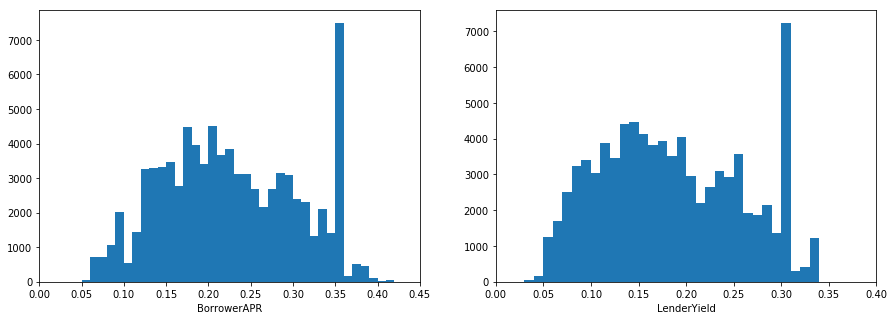

In [13]:
# We can see that the distribution of BorrowerAPR and LenderYield have a relatively similar multimodal distribution with a giant spike at the end
# The spike does not seem to be an outlier. Prosper Rates range from 6.95-35.99% and the spike seems to be the end of the range with high risk borrowers placed there.
# It is highly likely these two will be positively correlated. We will check this during bivariate exploration

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = .01
bins1 = np.arange(0, df1['BorrowerAPR'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins1)
plt.xlim([0,.45])
plt.xlabel('BorrowerAPR');


plt.subplot(1, 2, 2)
binsize2 = .01
bins2 = np.arange(0, df1['LenderYield'].max()+binsize2, binsize2)
plt.hist(data = df1, x = 'LenderYield', bins = bins2)
plt.xlim([0,.4])
plt.xlabel('LenderYield');

In [14]:
df1.groupby('ProsperRating_Alpha')['BorrowerAPR'].mean()

ProsperRating_Alpha
A     0.138909
AA    0.090041
B     0.184030
C     0.226124
D     0.280581
E     0.330551
HR    0.356061
Name: BorrowerAPR, dtype: float64

In [15]:
df1['ProsperRating_Alpha'].value_counts().sort_index()

A     14551
AA     5372
B     15581
C     18345
D     14274
E      9795
HR     6935
Name: ProsperRating_Alpha, dtype: int64

In [16]:
df1.query(' BorrowerAPR >= .35 & BorrowerAPR < .37').ProsperRating_Alpha.value_counts()

HR    5310
E     2309
D       19
C        4
Name: ProsperRating_Alpha, dtype: int64

In [17]:
print(df1[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe())

       CreditScoreRangeLower  CreditScoreRangeUpper
count           84853.000000           84853.000000
mean              699.390240             718.390240
std                47.095937              47.095937
min               600.000000             619.000000
25%               660.000000             679.000000
50%               700.000000             719.000000
75%               720.000000             739.000000
max               880.000000             899.000000


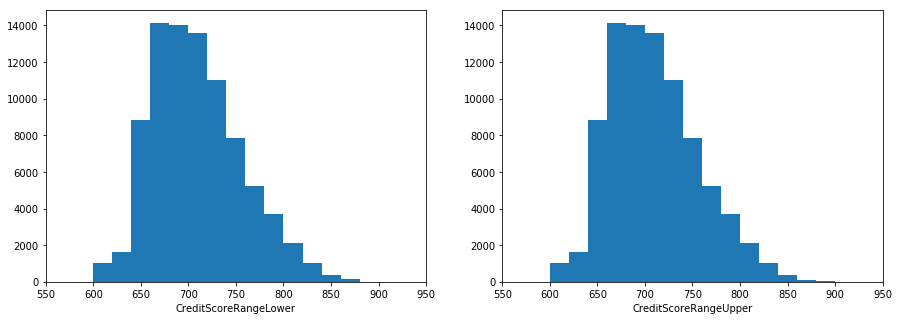

In [18]:
# We can see the data in the distribution start from 600. 
# This is because of Prospers requirement for a borrower to request loan. They need to have a FICO 8 credit score of 
# 1) at least 640 for new borrowers
# 2) and a score of 600 for returning borrowers
# Since peer to peer lending is an unsecured personal loan, Prosper is choosing its borrowers carefully to limit loan defaults.
# The distribution is right skewed because the average credit score tends to be in the upper 690's and lower 700's.
# https://www.experian.com/blogs/ask-experian/what-is-the-average-credit-score-in-the-u-s/

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = 20
bins1 = np.arange(0, df1['CreditScoreRangeLower'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'CreditScoreRangeLower', bins = bins1)
plt.xlim([550,950])
plt.xlabel('CreditScoreRangeLower')

plt.subplot(1, 2, 2) 
binsize2 = 20
bins2 = np.arange(0, df1['CreditScoreRangeUpper'].max()+binsize2, binsize2)
plt.hist(data = df1, x = 'CreditScoreRangeUpper', bins = bins2)
plt.xlim([550,950])
plt.xlabel('CreditScoreRangeUpper');

In [19]:
print(df1[['ProsperScore']].describe())

       ProsperScore
count  84853.000000
mean       5.950067
std        2.376501
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       11.000000


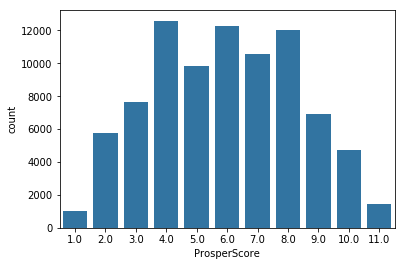

In [20]:
# A custom risk score built using historical Prosper data. 
# The score ranges from 1-10, with 10 being the best, or lowest risk score.  
# Applicable for loans originated after July 2009.
# Unlike credit score which is right skewed, the distribution of ProsperScore looks normally distributed. It suggests overall risk is nicely balanced out.
# I would still expect to see some degree of positive correlation between Prosper Score and Credit score which we will explore in a Bivariate Plot.


base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'ProsperScore', color = base_color);

In [21]:
df1.LoanStatus.value_counts(sort = False)

Past Due (91-120 days)      304
FinalPaymentInProgress      205
Past Due (16-30 days)       265
Completed                 19664
Past Due (>120 days)         16
Defaulted                  1005
Chargedoff                 5336
Past Due (1-15 days)        806
Current                   56576
Past Due (61-90 days)       313
Past Due (31-60 days)       363
Name: LoanStatus, dtype: int64

In [22]:
var = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Chargedoff']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['LoanStatus'] = df1['LoanStatus'].astype(ordered_var)

In [23]:
df1.LoanStatus.value_counts(sort = False)

Completed                 19664
FinalPaymentInProgress      205
Current                   56576
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (>120 days)         16
Defaulted                  1005
Chargedoff                 5336
Name: LoanStatus, dtype: int64

In [24]:
var = ['Chargedoff','Defaulted','Past Due (>120 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (16-30 days)','Past Due (1-15 days)','Current','FinalPaymentInProgress','Completed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['LoanStatus'] = df1['LoanStatus'].astype(ordered_var)

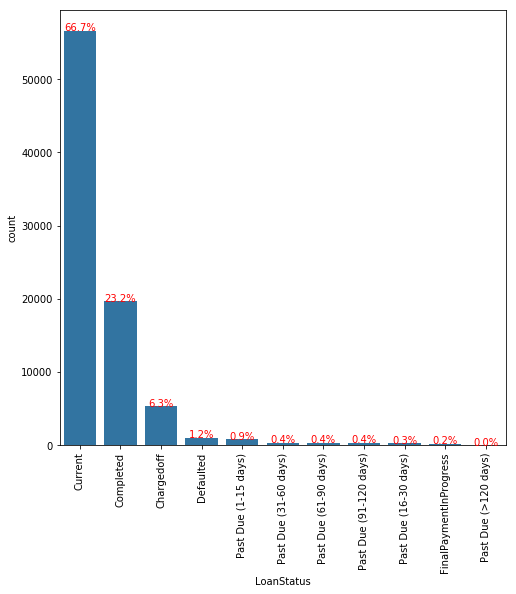

In [25]:
# It must be rejoicing for the lenders to see close to 90% loan status are current or completed.

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 8])
cat_order = df1['LoanStatus'].value_counts().index
sb.countplot(data = df1, x = 'LoanStatus', color = base_color, order = cat_order)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['LoanStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    plt.xticks(rotation = 90);

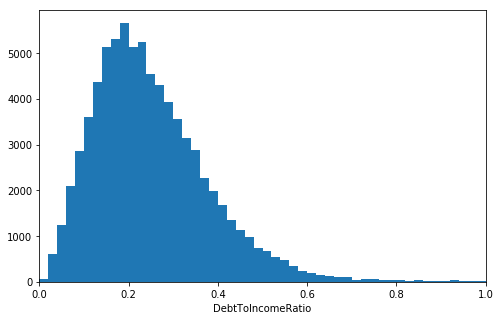

In [26]:
# The distribution is right skewed. It is interesting to see lot borrowers with low DebtToIncomeRatio are procuring loan.
# A look at the reason why the loans are sought will help us understand why these borrowers are seeking loans.

binsize = .02
bins = np.arange(0, df1['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,1])
plt.xlabel('DebtToIncomeRatio')
plt.show()

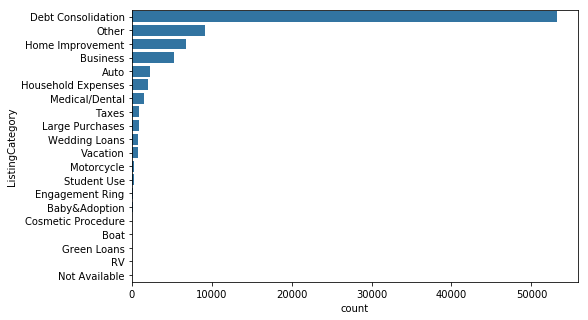

In [27]:
# It appears majority of the loans sought are for the purpose of debt consolidation.
# It makes sense that we are not seeing a larger DebtToIncomeRatio because the majority of loans are taken for debt consolidation.
# Debt consolidation rolls high-interest debts, such as credit card bills, into a single, lower-interest payment.
# Essentially it transfer of debt from one institution to other and reduce high interest payments.
# https://www.nerdwallet.com/blog/finance/consolidate-debt/

base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
cat_order = df1['ListingCategory'].value_counts().index
sb.countplot(data = df1, y = 'ListingCategory', color = base_color , order = cat_order);
#plt.xticks(rotation = 90);

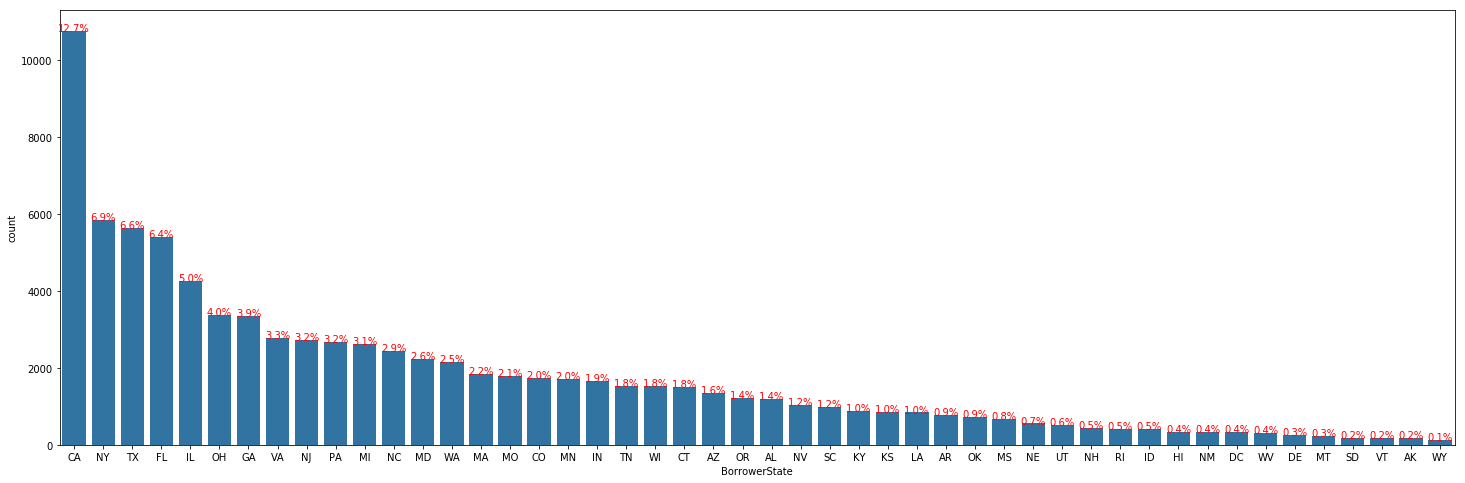

In [28]:
# The distribution of the loans by state closely follows the distribution of states with largest population.

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 8])
cat_order = df1['BorrowerState'].value_counts().index
sb.countplot(data = df1, x = 'BorrowerState', color = base_color, order = cat_order)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['BorrowerState'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')

In [29]:
# IncomeRange is an ordinal categorical variable. PLotting it as-is will not show us any insight readily. 
# Hence we will order it before plot a barchart of it.

var = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['IncomeRange'] = df1['IncomeRange'].astype(ordered_var) 

In [30]:
df1.IncomeRange.value_counts(sort = False)

Not employed        649
$0                   45
$1-24,999          4654
$25,000-49,999    24175
$50,000-74,999    25627
$75,000-99,999    14498
$100,000+         15205
Name: IncomeRange, dtype: int64

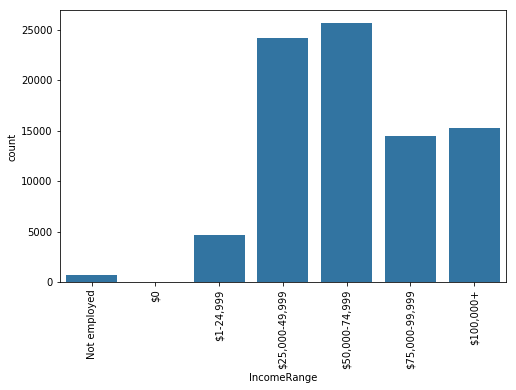

In [31]:
# The ordered barchart shows that majority of borrowers have an income range between $25000 - $74999

base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data = df1, x = 'IncomeRange', color = base_color);
plt.xticks(rotation = 90);

In [32]:
# Calculations to show mean and median of StatedMonthlyIncome variable.

MonthlyIncome25k_75k_mean = df1.query(' StatedMonthlyIncome >= 25000/12 & StatedMonthlyIncome < 74999/12').StatedMonthlyIncome.mean()
#MonthlyIncome_mean = df1.StatedMonthlyIncome.mean()
MonthlyIncome_median = df1.StatedMonthlyIncome.median()

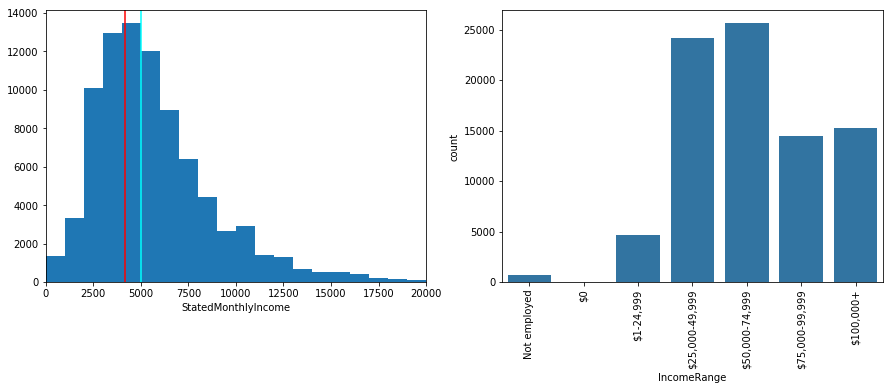

In [33]:
# Lets plot StatedMonthlyIncome and IncomeRange side by side and see if they match.
# StatedMonthlyIncome is right skewed and has a median close to the mean of MonthlyIncome between 25k/12 and 75k/12.
# The distribution closely matches the income range on the right.

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = 1000
bins1 = np.arange(0, df1['StatedMonthlyIncome'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'StatedMonthlyIncome', bins = bins1)
plt.xlim([0,20000])
plt.axvline(MonthlyIncome25k_75k_mean, c='red');
#plt.axvline(MonthlyIncome_mean, c='yellow');
plt.axvline(MonthlyIncome_median, c='cyan');
plt.xlabel('StatedMonthlyIncome');

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'IncomeRange', color = base_color);
plt.xticks(rotation = 90);

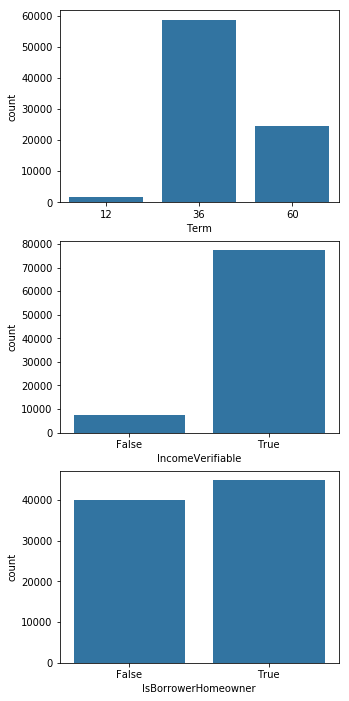

In [34]:
# let's plot some of the other categorical variables to get some insights.
# Most loans are taken for 36 months term.
# 88% borrowers incomes are verifiable
# More than half of the borrowers are home owners.

fig, ax = plt.subplots(nrows=3, figsize = [5,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df1, x = 'IncomeVerifiable', color = default_color, ax = ax[1])
sb.countplot(data = df1, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[2])

plt.show()

In [35]:
# Descriptive statistics for 'LoanOriginalAmount','OpenRevolvingMonthlyPayment' to find bin size for the plots

print(df1[['LoanOriginalAmount','OpenRevolvingMonthlyPayment']].describe())

       LoanOriginalAmount  OpenRevolvingMonthlyPayment
count        84853.000000                 84853.000000
mean          9083.440515                   430.721954
std           6287.860058                   425.874661
min           1000.000000                     0.000000
25%           4000.000000                   156.000000
50%           7500.000000                   311.000000
75%          13500.000000                   564.000000
max          35000.000000                 13765.000000


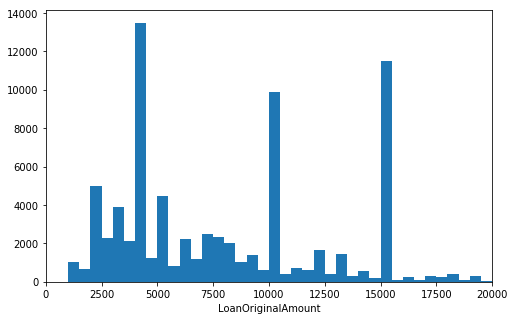

In [36]:
# The histogram alone does not tell clearly how the distribution for loan amount is.
# There are few spikes near 4k, 10k and 15k
# Let us use seaborn to create a distplot

binsize = 500
bins = np.arange(0, df1['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,20000])
plt.xlabel('LoanOriginalAmount')
plt.show()

C:\Users\vijay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


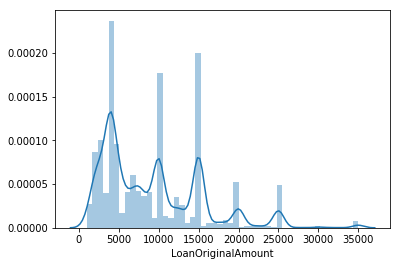

In [37]:
# From plot below LoanOriginalAmount looks multimodal distrubution and is right skewed. 

sb.distplot(df1['LoanOriginalAmount']);

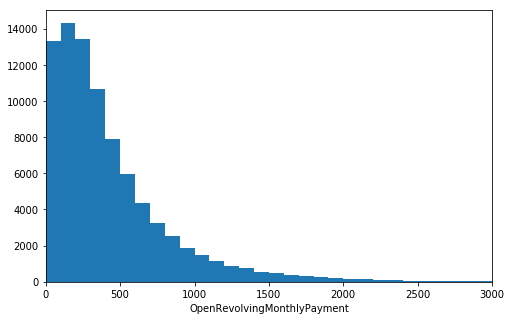

In [38]:
# The distribution is right skewed with median close to $250. There arent lot of monthly payments greater than $2500

binsize = 100
bins = np.arange(0, df1['OpenRevolvingMonthlyPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'OpenRevolvingMonthlyPayment', bins = bins)
plt.xlim([0,3000])
plt.xlabel('OpenRevolvingMonthlyPayment')
plt.show()

In [39]:
# IncomeRange is an ordinal categorical variable. PLotting it as-is will not show us any insight readily. 
# Hence we will order it before plot a barchart of it.

var = ['Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013','Q3 2013','Q4 2013','Q1 2014']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['LoanOriginationQuarter'] = df1['LoanOriginationQuarter'].astype(ordered_var) 

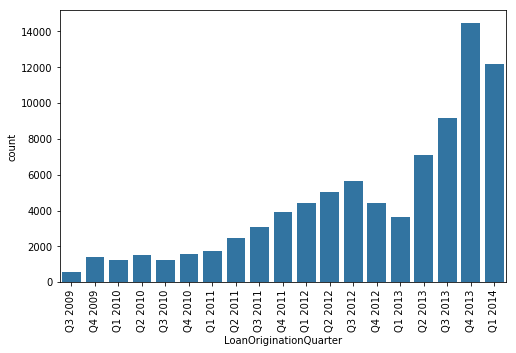

In [40]:
# The ordered barchart shows significant number of loans were taken after Q1 2013.
# It would be worthwhile to look at the avg amount of loans taken over the period.

base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data = df1, x = 'LoanOriginationQuarter', color = base_color);
plt.xticks(rotation = 90);

In [41]:
df1.LoanOriginationQuarter.value_counts(sort = False)

Q3 2009      559
Q4 2009     1417
Q1 2010     1226
Q2 2010     1518
Q3 2010     1256
Q4 2010     1579
Q1 2011     1744
Q2 2011     2478
Q3 2011     3093
Q4 2011     3913
Q1 2012     4435
Q2 2012     5061
Q3 2012     5632
Q4 2012     4425
Q1 2013     3616
Q2 2013     7099
Q3 2013     9180
Q4 2013    14450
Q1 2014    12172
Name: LoanOriginationQuarter, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The borrower APR and lender yield were my main features of interest. The distributions are multimodal with a giant spike towards the end. I thought these were outliers(requiring cleanup) but after additional analysis on APR these were found to be the APR's provided to high risk borrowers. The higher APR is consistent with upper limit of the rates mentioned by Prosper in their website. Hence I did not perform any additional transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I investigated lot of categorical and quantitative variables (such as  ListingCategory,BorrowerState, Term, ProsperScore, LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,OpenRevolvingMonthlyPayment) for my univariate distribution. There werent any unusual distrbution. However some of the categorical variables (like LoanOriginationQuarter and IncomeRange) were ordinal type and required sorting to show their natural order.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in Prosper Loans dataset
data. A univariate exploration of the variables to be explored was done in the previous section. 
Some of variables we will consider in the below section are 'BorrowerAPR','LenderYield','CreditScoreRangeLower','CreditScoreRangeUpper','LoanOriginalAmount','ProsperScore', 'LoanStatus','LoanOriginationQuarter', 'IncomeRange'

In [42]:
numeric_vars = ['BorrowerAPR','LenderYield','CreditScoreRangeLower','CreditScoreRangeUpper','LoanOriginalAmount','StatedMonthlyIncome']
categoric_vars = ['ProsperScore', 'LoanStatus', 'BorrowerState','LoanOriginationQuarter']

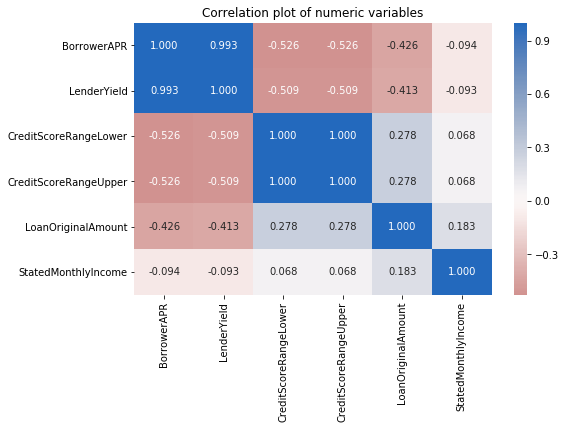

In [43]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation plot of numeric variables');
plt.show()

C:\Users\vijay\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\vijay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vijay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


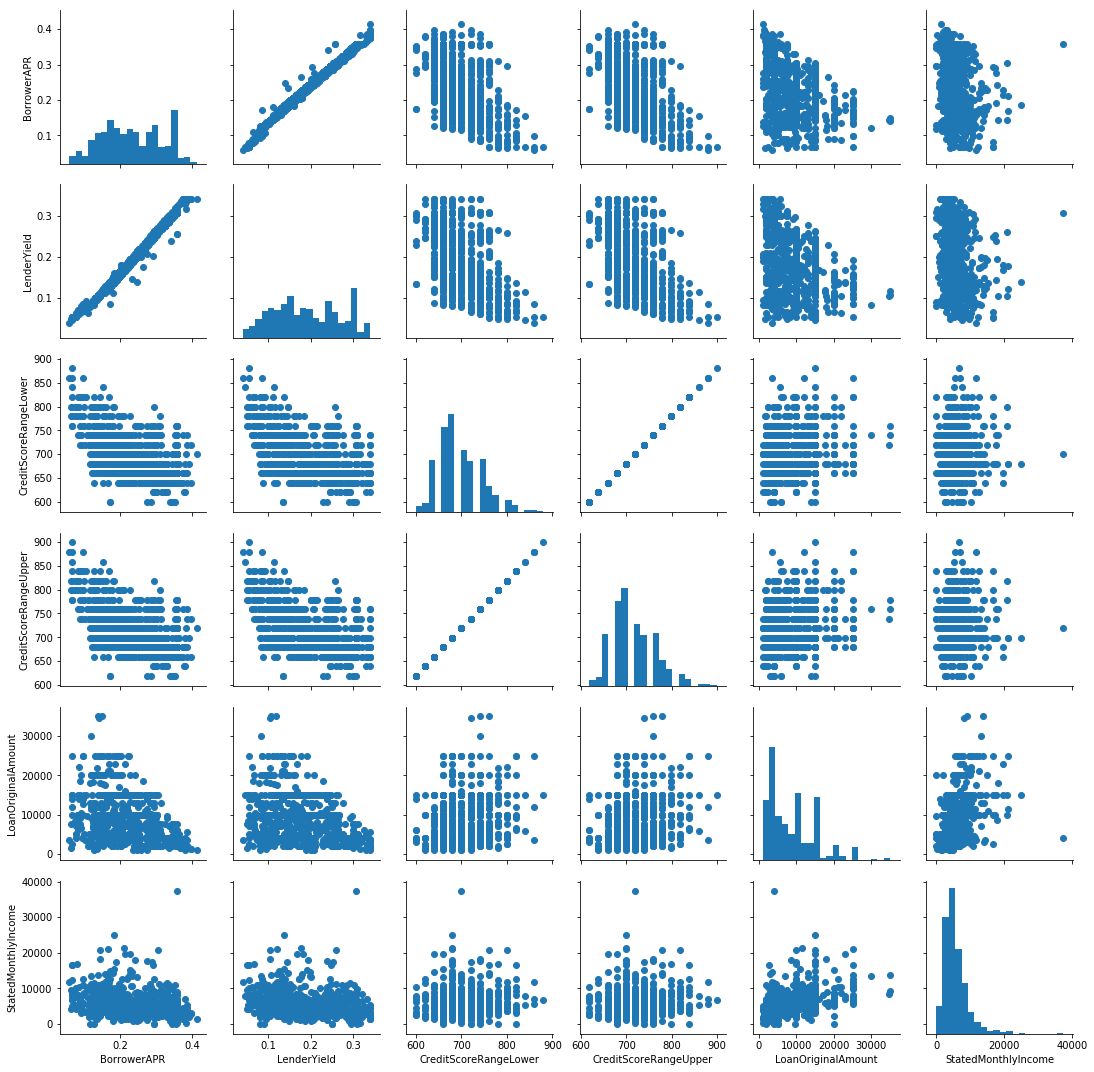

In [44]:
# plot matrix: sample 1000 loan listing so that plots are clearer and
# they render faster
samples = np.random.choice(df1.shape[0], 1000 , replace = False)
prosper_samp = df1.loc[samples,:]

g = sb.PairGrid(data = prosper_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

###### With respect to this dataset., two things are very clear from the plot above. Borrower APR and Lender Yields have a very strong positive correlation. Higher borrower APR seems to bring in higher yields to the lender. Likewise Borrower APR and Credit Scores are negatively correlated. As the borrowers credit score increases, their APR decreases. There is also a negative correlation between APR and LoanAmount. This is unexpected as I believed a large loan amount would incur larger APR. We will check the credit score and prosper score of the larger loans to see if these were the main drivers. 
###### In the upcoming cells we will plot the Prosper score against APR to find out the if additional factors used by Prosper to arrive at the score helped borrowers with lower score receive better APR.

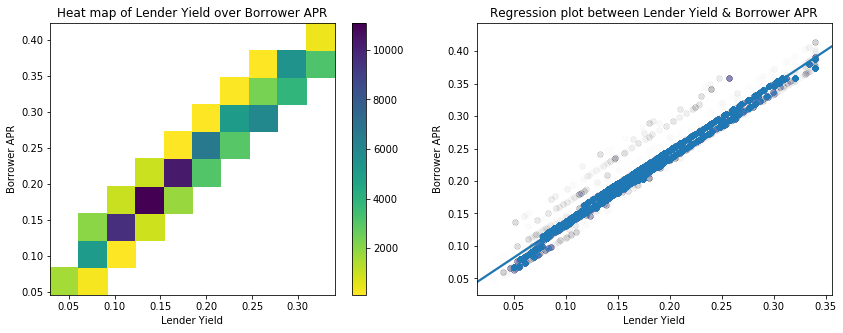

In [45]:
# Lets take a quick look at the how APR is spread over Credit Score
# We can see a Borrowers with large APR being on the lower end of credit range and gradually decreasing as credit score increases.
# There are lot of borrowers in the 675-700 range who received a range of APR with 20 to 22.5% being the most
# Lets create a reg plot to make the correlation between these two variables evident.
# It can be clearly seen the credit score and APR are negatively correlated.

plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data = df1, x = 'LenderYield', y = 'BorrowerAPR',
             cmap = 'viridis_r', cmin = 100);
plt.colorbar()
plt.title('Heat map of Lender Yield over Borrower APR')
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR');

plt.subplot(1, 2, 2)
sb.regplot(data = df1, y = 'BorrowerAPR', x = 'LenderYield' , scatter_kws = {'alpha' : .0025});
plt.title('Regression plot between Lender Yield & Borrower APR');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR');

In [46]:
# Lets take a look at the descriptive statistics to create bins for our 2d histogram

df1[['CreditScoreRangeUpper','LoanOriginalAmount','BorrowerAPR']].describe()

,CreditScoreRangeUpper,LoanOriginalAmount,BorrowerAPR
count,84853.000000,84853.000000,84853.000000
mean,718.390240,9083.440515,0.226658
std,47.095937,6287.860058,0.079916
min,619.000000,1000.000000,0.045830
25%,679.000000,4000.000000,0.163280
50%,719.000000,7500.000000,0.219450
75%,739.000000,13500.000000,0.292540
max,899.000000,35000.000000,0.423950


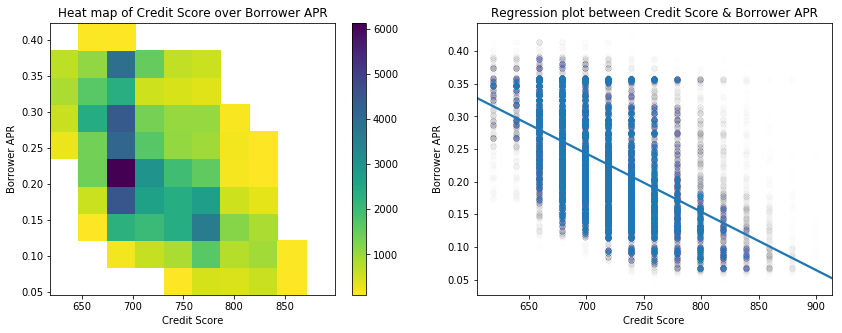

In [47]:
# Lets take a quick look at the how APR is spread over Credit Score
# We can see a Borrowers with large APR being on the lower end of credit range and gradually decreasing as credit score increases.
# There are lot of borrowers in the 675-700 range who received a range of APR with 20 to 22.5% being the most
# Lets create a reg plot to make the correlation between these two variables evident.
# It can be clearly seen the credit score and APR are negatively correlated.

plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data = df1, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR',
             cmap = 'viridis_r', cmin = 100);
plt.colorbar()
plt.title('Heat map of Credit Score over Borrower APR')
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR');

plt.subplot(1, 2, 2)
sb.regplot(data = df1, y = 'BorrowerAPR', x = 'CreditScoreRangeUpper' , scatter_kws = {'alpha' : .0025});
plt.title('Regression plot between Credit Score & Borrower APR');
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR');

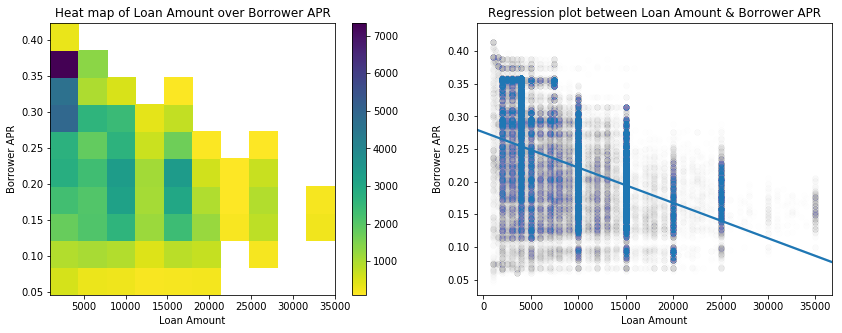

In [48]:
# Lets now look at APR is spread over Loan Amount.
# It can be noticed that smaller loans have incurred larger APRs
# Lets create a reg plot to make the correlation between these two variables evident.
# It can be clearly seen the Loan Amount and APR are negatively correlated.
# This is interesting because the expectation was that the larger loans would incur more APR.
# We need to take a look at some of the categorical variables (ProsperScore, LoanStatus, ListingCategory) if they are drivers for this unexpected correlation.

plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data = df1, x = 'LoanOriginalAmount', y = 'BorrowerAPR',
             cmap = 'viridis_r', cmin = 100);
plt.colorbar()
plt.title('Heat map of Loan Amount over Borrower APR')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR');

plt.subplot(1, 2, 2)
sb.regplot(data = df1, y = 'BorrowerAPR', x = 'LoanOriginalAmount' , scatter_kws = {'alpha' : .0025});
plt.title('Regression plot between Loan Amount & Borrower APR');
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR');

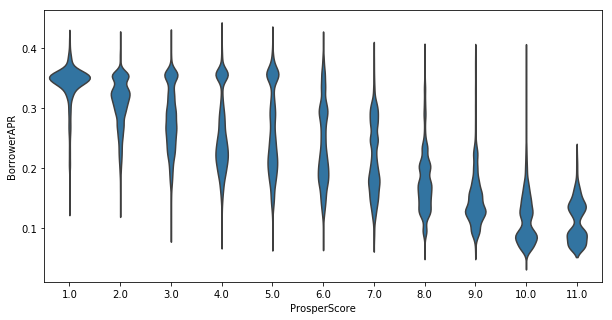

In [49]:
# We will now plot prosper score over borrowerAPR to understand how they are spread.
# It can be seen that the smaller the ProsperScore, density distribution of APR is on the higher end.
# All of the APR distribution are long with long tails. 
# This suggests large spread of APR's and significant outliers for any given prosper score.

plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df1, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color,
              inner = None);

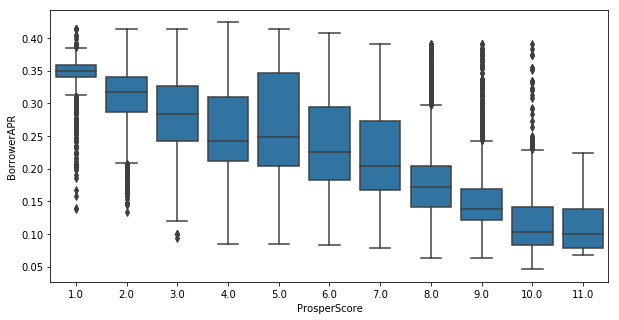

In [50]:
# Looking at the IQR from the boxplot below, it is very clear that as ProsperScore increases, the APR's decrease.
# There are long whiskers and outliers reconfirming what we saw above through the violin plot.

plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data = df1, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color);

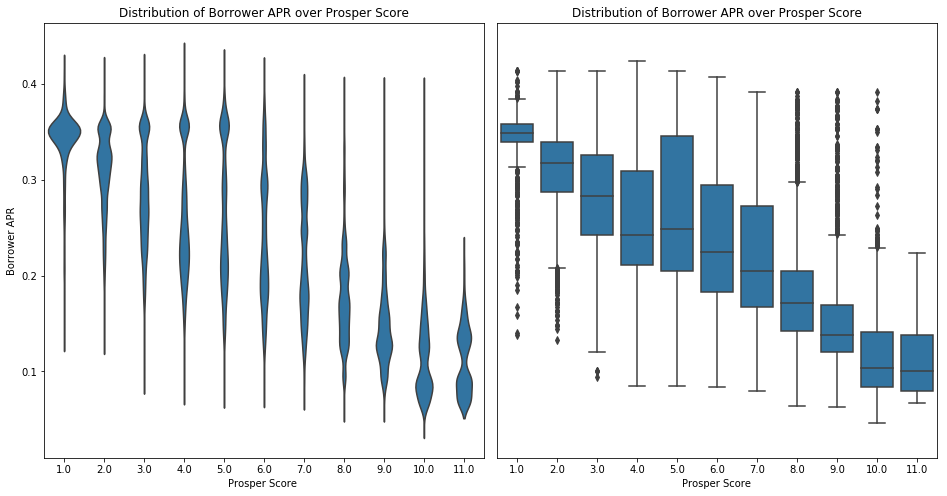

In [51]:
# Let us add the plots side by side to get a glimpse of actual density distribution of data vs IQR view of the data.

plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df1, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color , inner = None)
plt.title('Distribution of Borrower APR over Prosper Score');
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Score ');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df1, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.gca().axes.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=.03, hspace=0)
plt.title('Distribution of Borrower APR over Prosper Score');
plt.xlabel('Prosper Score');

In [52]:
var = [11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['ProsperScore'] = df1['ProsperScore'].astype(ordered_var)

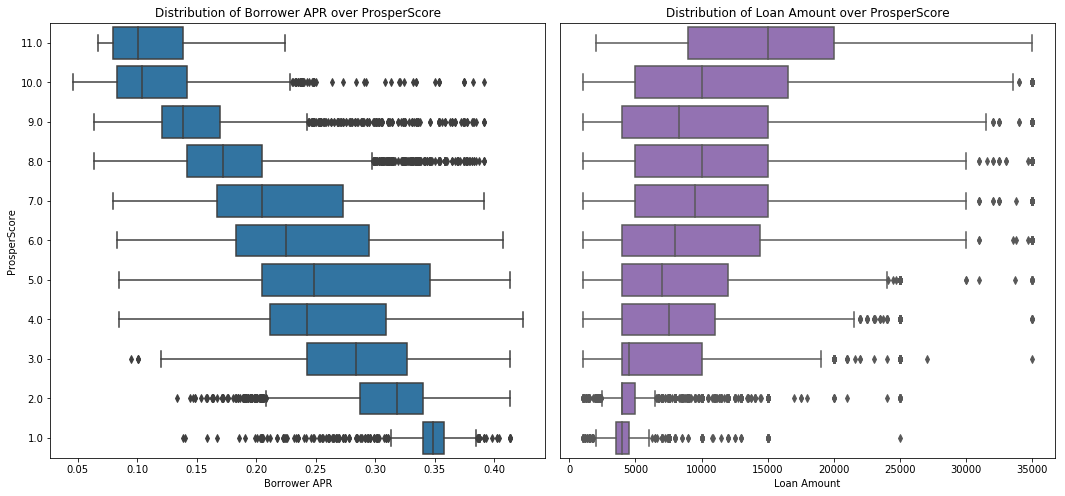

In [53]:
plt.figure(figsize = [18, 8])
base_color1 = sb.color_palette()[0]
base_color2 = sb.color_palette()[4]

# df1.groupby('LoanStatus')['BorrowerAPR'].mean().sort_values(ascending=False)

plt.subplot(1, 2, 1)
sb.boxplot(data = df1, y = 'ProsperScore', x = 'BorrowerAPR', color = base_color1);
plt.title('Distribution of Borrower APR over ProsperScore');
plt.ylabel('ProsperScore')
plt.xlabel('Borrower APR');


plt.subplot(1, 2, 2)
sb.boxplot(data = df1, y = 'ProsperScore', x = 'LoanOriginalAmount', color = base_color2);
#plt.yticks([])
plt.gca().axes.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=.03, hspace=0)
plt.title('Distribution of Loan Amount over ProsperScore');
plt.xlabel('Loan Amount');

In [54]:
df1.groupby('LoanStatus')['BorrowerAPR'].mean().sort_values(ascending=False)

LoanStatus
Chargedoff                0.293744
Defaulted                 0.287694
Past Due (>120 days)      0.283993
Past Due (61-90 days)     0.273360
Past Due (91-120 days)    0.270808
Past Due (16-30 days)     0.268445
Past Due (31-60 days)     0.265734
Past Due (1-15 days)      0.263828
Completed                 0.238192
FinalPaymentInProgress    0.229558
Current                   0.213740
Name: BorrowerAPR, dtype: float64

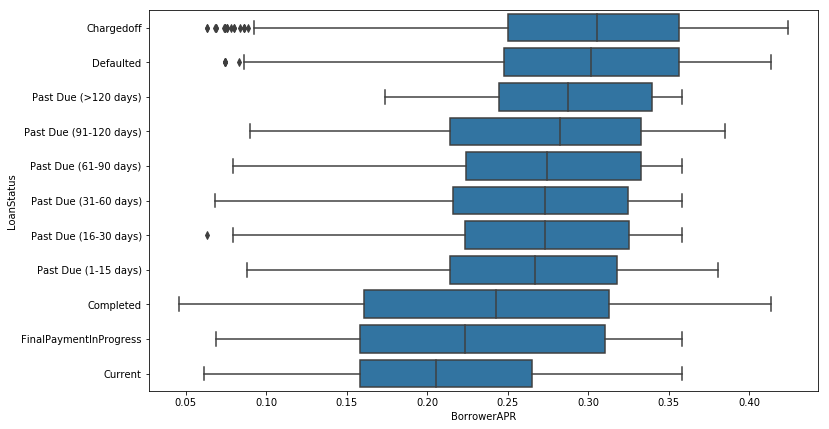

In [55]:
# Let us look at another key factor in this dataset (LoanStatus) and how it affects APR. 

plt.figure(figsize=[12, 7])
base_color = sb.color_palette()[0]

s = df1.groupby('LoanStatus')['BorrowerAPR'].median().sort_values(ascending=False)

sb.boxplot(data = df1, y = 'LoanStatus', x = 'BorrowerAPR', color = base_color, order = s.index);

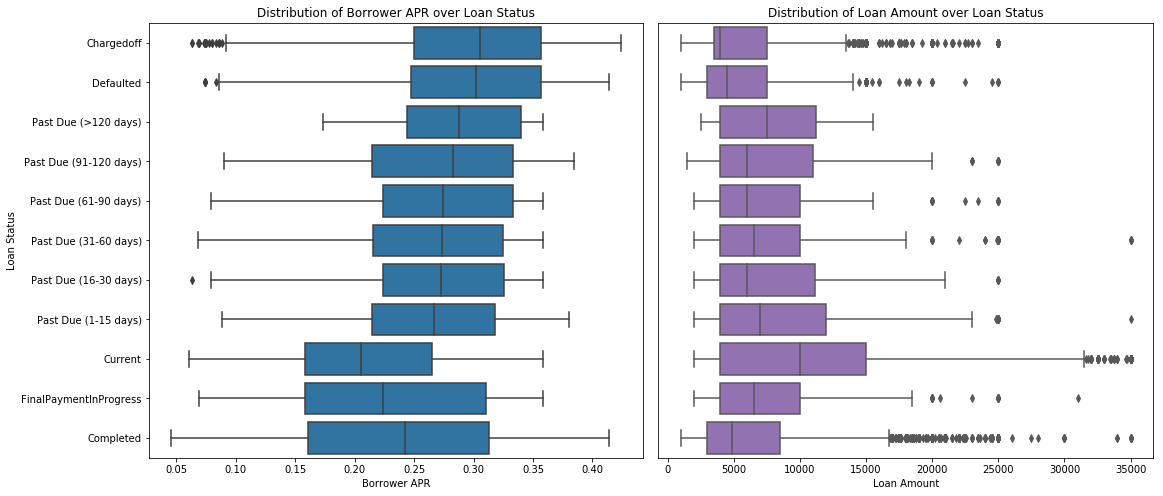

In [56]:
# The plot clearly shows that the borrowers who were on track with the loan or already completed it had significantly lower APR.
# Borrowers who are delinquent had significantly higher APRs. 
# Something interesting to note though the borrowers with larger loans are current with the payemnts.
# while the borrowers with smaller loans have defaulted. 
# We need to look at the income range to find out if that was a factor leading to non-repayment of loans.
# It is important to stay current with payments as it could help reducing the APRs through renegotiations with current lender or during refinancing with other lenders.


plt.figure(figsize = [18, 8])
base_color1 = sb.color_palette()[0]
base_color2 = sb.color_palette()[4]

# df1.groupby('LoanStatus')['BorrowerAPR'].mean().sort_values(ascending=False)

plt.subplot(1, 2, 1)
sb.boxplot(data = df1, y = 'LoanStatus', x = 'BorrowerAPR', color = base_color1);
plt.title('Distribution of Borrower APR over Loan Status');
plt.ylabel('Loan Status')
plt.xlabel('Borrower APR');


plt.subplot(1, 2, 2)
sb.boxplot(data = df1, y = 'LoanStatus', x = 'LoanOriginalAmount', color = base_color2);
#plt.yticks([])
plt.gca().axes.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=.03, hspace=0)
plt.title('Distribution of Loan Amount over Loan Status');
plt.xlabel('Loan Amount');

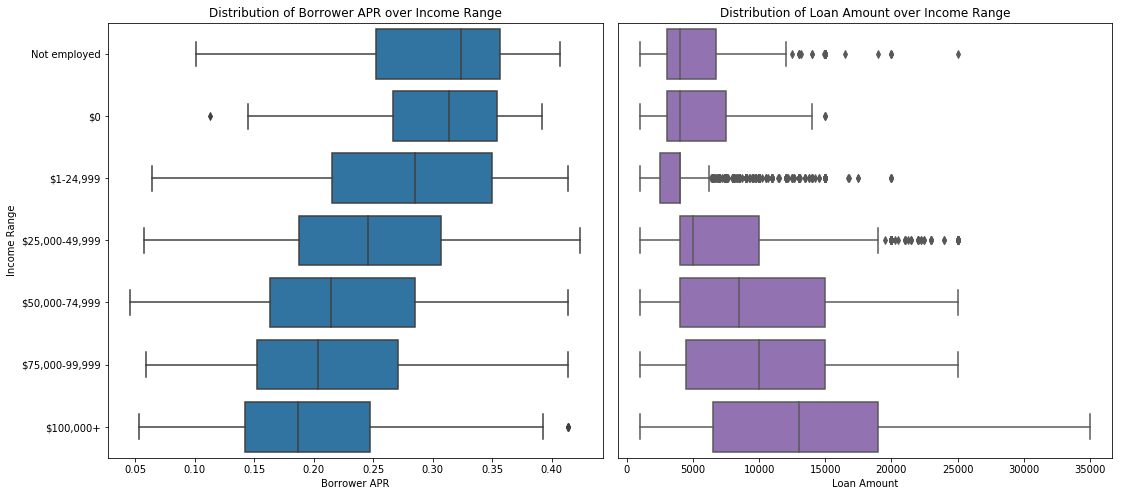

In [57]:
# It appears the income range drives the APR that could be secured by a borrower.
# We can see that borrowers in High Income range were able to secure lower APR and higher loan amounts.
# Borrowers in low income range got lower loan amounts for high APRs.
# Is it due to their limited ability to repay?

plt.figure(figsize = [18, 8])
base_color1 = sb.color_palette()[0]
base_color2 = sb.color_palette()[4]


plt.subplot(1, 2, 1)
sb.boxplot(data = df1, y = 'IncomeRange', x = 'BorrowerAPR', color = base_color1)
plt.title('Distribution of Borrower APR over Income Range');
plt.ylabel('Income Range')
plt.xlabel('Borrower APR');

plt.subplot(1, 2, 2)
sb.boxplot(data = df1, y = 'IncomeRange', x = 'LoanOriginalAmount', color = base_color2);
plt.gca().axes.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=.03, hspace=0)
plt.title('Distribution of Loan Amount over Income Range')
#plt.ylabel('Income Range')
plt.xlabel('Loan Amount');

C:\Users\vijay\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


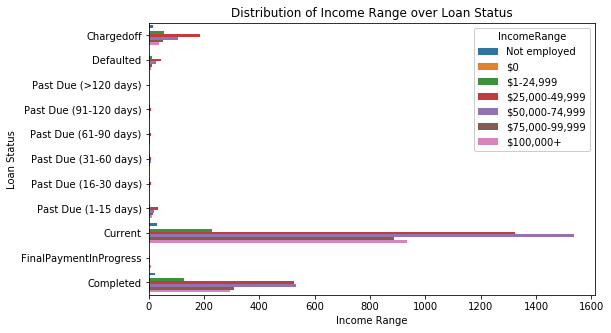

In [58]:
# We will take a look at Income Range vs Loan Status. 
# The entire spectrum of borrowers tried to stay current on their loans.
# As we saw in univariate plots 90% of borrowers either completed or current with their loan, the plots will be skewed in that category when we take them into account.

samples = np.random.choice(df1.shape[0], 10000 , replace = False)
prosper_samp = df1.loc[samples,:]

plt.figure(figsize=[8, 5])
ax = sb.countplot(data = prosper_samp, y = 'LoanStatus', hue = 'IncomeRange')
ax.legend(loc = 1, ncol = 1,framealpha = 1, title = 'IncomeRange')
#plt.xticks(rotation = 90);
plt.title('Distribution of Income Range over Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Income Range');

In [59]:
var = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Chargedoff']

df1_NPL = df1[df1.LoanStatus.isin(var)]

df1_NPL['LoanStatus'] = df1_NPL['LoanStatus'].cat.remove_unused_categories()

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
df1_NPL['LoanStatus'].unique()

[Past Due (1-15 days), Defaulted, Chargedoff, Past Due (16-30 days), Past Due (61-90 days), Past Due (31-60 days), Past Due (91-120 days), Past Due (>120 days)]
Categories (8, object): [Chargedoff < Defaulted < Past Due (>120 days) < Past Due (91-120 days) < Past Due (61-90 days) < Past Due (31-60 days) < Past Due (16-30 days) < Past Due (1-15 days)]

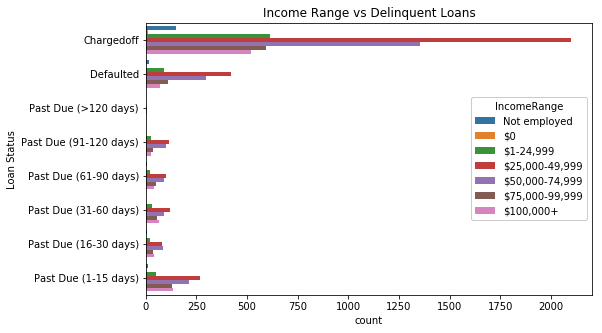

In [61]:
# To focus on the deliquent and non-performing loans, we will filter just for these loan types and see borrowers of which income range let their loans be delinquent.
# But it can be seen more borrowers with IncomeRange greater than $25k and less than $50k let their loans into delinquency.

plt.figure(figsize=[8, 5])
ax = sb.countplot(data = df1_NPL, y = 'LoanStatus', hue = 'IncomeRange')
ax.legend(loc = 5, ncol = 1,framealpha = 1, title = 'IncomeRange')
#plt.xticks(rotation = 90);
plt.title('Income Range vs Delinquent Loans')
plt.ylabel('Loan Status');
#plt.xlabel('Income Range');

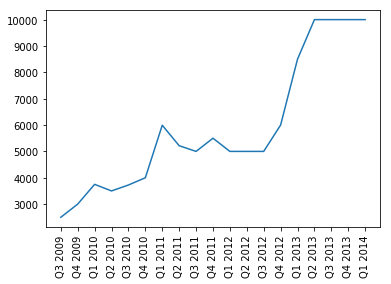

In [62]:
df_loan = df1.groupby(['LoanOriginationQuarter'])['LoanOriginalAmount'].median().reset_index()

plt.errorbar(data = df_loan, x = 'LoanOriginationQuarter', y = 'LoanOriginalAmount');
plt.xticks(rotation = 90);

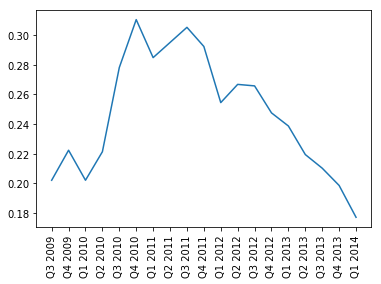

In [63]:
df_loan = df1.groupby(['LoanOriginationQuarter'])['BorrowerAPR'].median().reset_index()

plt.errorbar(data = df_loan, x = 'LoanOriginationQuarter', y = 'BorrowerAPR');
plt.xticks(rotation = 90);

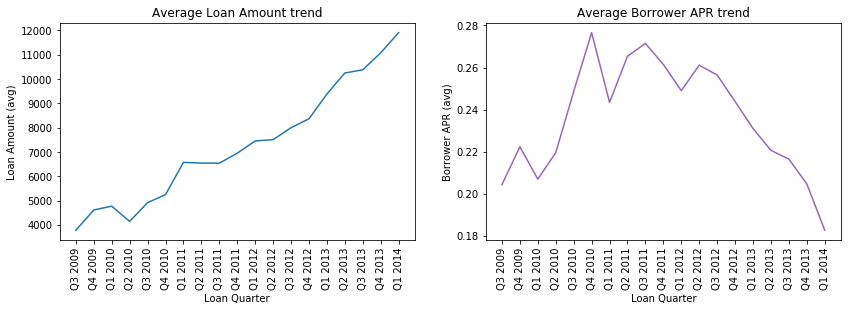

In [64]:
# It is quite interesting to see that over the year loan amounts have increased while the APR's have fallen.
# Is it the case for borrowers for all income ranges?

plt.figure(figsize = [14, 4])
base_color1 = sb.color_palette()[0]
base_color2 = sb.color_palette()[4]

df_loan = df1.groupby(['LoanOriginationQuarter'])['LoanOriginalAmount'].mean().reset_index()
plt.subplot(1, 2, 1)
sb.lineplot(x="LoanOriginationQuarter", y="LoanOriginalAmount", data=df_loan , color = base_color1)
plt.title('Average Loan Amount trend')
plt.ylabel('Loan Amount (avg)');
plt.xlabel('Loan Quarter');
plt.xticks(rotation = 90);

df_loan = df1.groupby(['LoanOriginationQuarter'])['BorrowerAPR'].mean().reset_index()
plt.subplot(1, 2, 2)
sb.lineplot(x="LoanOriginationQuarter", y="BorrowerAPR", data=df_loan , color = base_color2)
plt.title('Average Borrower APR trend')
plt.ylabel('Borrower APR (avg)');
plt.xlabel('Loan Quarter');
plt.xticks(rotation = 90);

In [65]:
df1.groupby('ListingCategory')['BorrowerAPR'].mean().sort_values(ascending=False)

ListingCategory
Not Available         0.272537
Cosmetic Procedure    0.262957
Household Expenses    0.258617
Other                 0.247937
Auto                  0.245561
Medical/Dental        0.242020
Vacation              0.241323
Business              0.240598
Taxes                 0.239886
RV                    0.238492
Wedding Loans         0.238488
Student Use           0.237241
Home Improvement      0.230709
Green Loans           0.230642
Motorcycle            0.229840
Engagement Ring       0.228982
Large Purchases       0.221856
Debt Consolidation    0.218002
Baby&Adoption         0.215822
Boat                  0.205051
Name: BorrowerAPR, dtype: float64

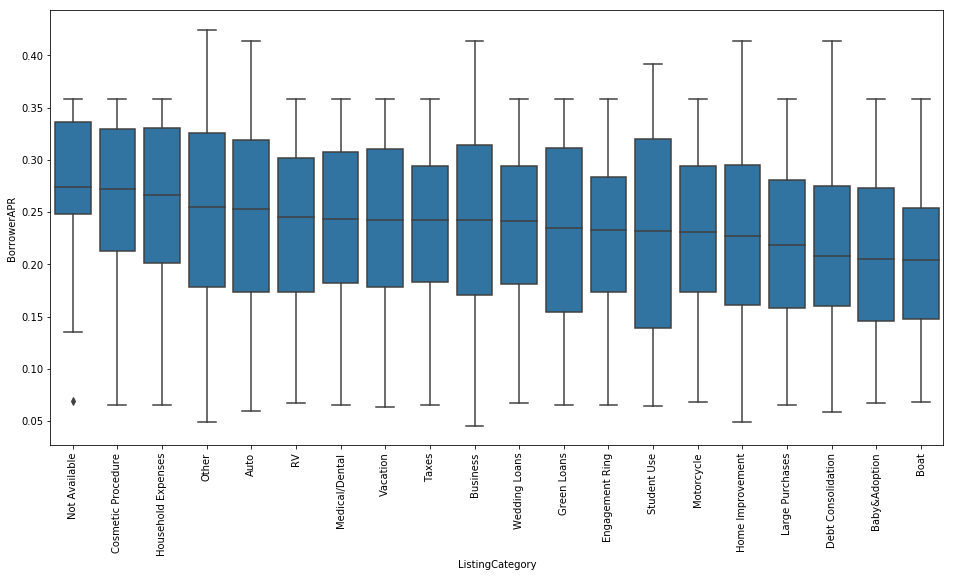

In [66]:
# Lets quickly plot couple more variable to find if there any interesting insights and move on to Multivariate analysis
# The APRs were high for listing categories where reasons were not available, Cosmetic procedures, others whereas they were comparatively low for Large Purchases, Debt Consolidation, Baby&Adoption  
# Not a lot of insight but it is good to know. 
# The long distribution and whiskers suggest each of the category had a range of APR.

plt.figure(figsize=[16, 8])
base_color = sb.color_palette()[0]

s = df1.groupby('ListingCategory')['BorrowerAPR'].median().sort_values(ascending=False)

sb.boxplot(data = df1, x = 'ListingCategory', y = 'BorrowerAPR', color = base_color, order=s.index);
plt.xticks(rotation = 90);

In [67]:
df1.groupby('ListingCategory')['LoanOriginalAmount'].median().sort_values(ascending=False)

ListingCategory
Debt Consolidation    10000
Baby&Adoption          9000
Wedding Loans          7500
Business               7500
Boat                   7000
Engagement Ring        6500
Large Purchases        6500
Home Improvement       6200
RV                     6000
Taxes                  5000
Green Loans            5000
Medical/Dental         4075
Cosmetic Procedure     4000
Household Expenses     4000
Vacation               4000
Motorcycle             4000
Not Available          4000
Other                  4000
Auto                   4000
Student Use            2300
Name: LoanOriginalAmount, dtype: int64

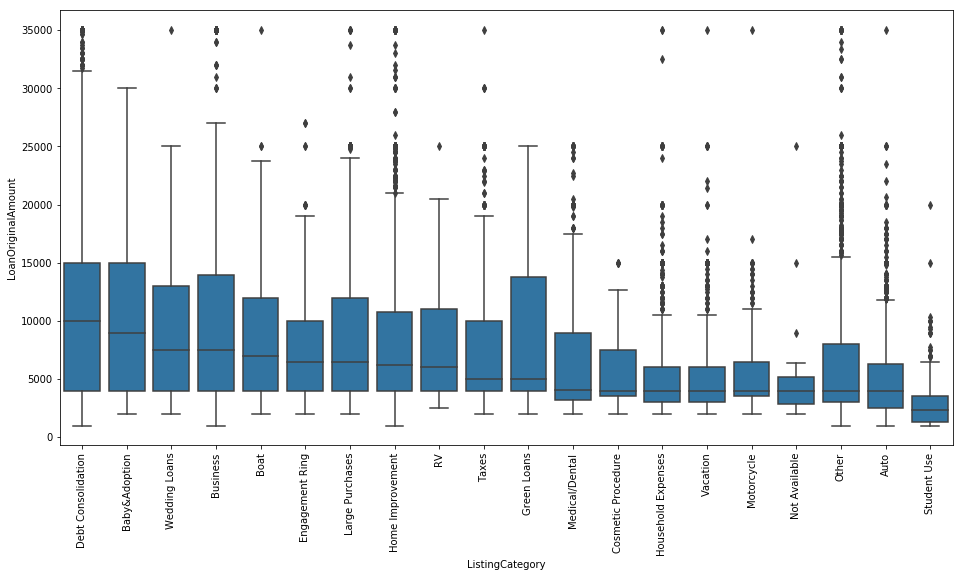

In [68]:
# Most of the Large loans were sought for Debt Consolidation, Baby&Adoption whereas smaller loans were taken for student use.

plt.figure(figsize=[16, 8])
base_color = sb.color_palette()[0]

s = df1.groupby('ListingCategory')['LoanOriginalAmount'].median().sort_values(ascending=False)

sb.boxplot(data = df1, x = 'ListingCategory', y = 'LoanOriginalAmount', color = base_color, order=s.index);
plt.xticks(rotation = 90);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My main features of interest Borrower APR and Lender Yield have a very strong positive correlation. On the other hand Borrower APR and credit score; Borrower APR and Loan amount had a strong negative correlation. The negative correlation between Borrower APR and Loan amount was interesting as it ran contrary to my belief. But after plotting additional visuals it was clear that these larger loan were requested by borrowers who fall under higher income and higher Prosper score.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Some of the other interesting relationships I observed in this dataset is 
<br> 1) There is a fall in the average APR over the time periods whereas large loans were borrowed over time.
<br> 2) Borrowers who earn less than USD 75000 tend to let their loans go into delinquency.
<br> 3) Borrowers who are current on their loan were able to get lower APRs and larger loans.


## Multivariate Exploration

> An interesting trend that I came across in the previous section was that the APRs have fallen and Loan Amounts secured have risen over the time period. I would like investigate further if this trend holds true for borrowers of all ProsperScores and CreditScores.

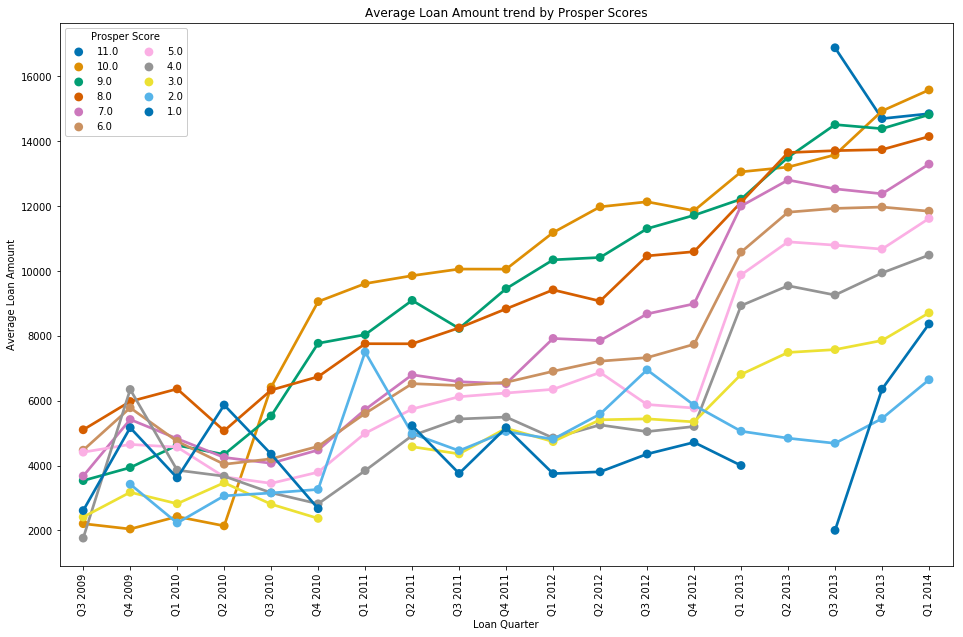

In [116]:
# We can see that avg loan amount secured by borrowers of various prosper scores are having an upward trend.
# It is interesting to note that borrowers of higher ProsperScore were able to secure larger loans.

df_loan = df1.groupby(['LoanOriginationQuarter','ProsperScore'])['LoanOriginalAmount'].mean().reset_index()

plt.figure(figsize=[16, 10])
ax = sb.pointplot(data = df_loan, x = 'LoanOriginationQuarter', y = 'LoanOriginalAmount', hue = 'ProsperScore',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 2, ncol = 2,framealpha = 1, title = 'Prosper Score')
plt.title('Average Loan Amount trend by Prosper Scores')
plt.ylabel('Average Loan Amount');
plt.xlabel('Loan Quarter');
plt.xticks(rotation = 90);

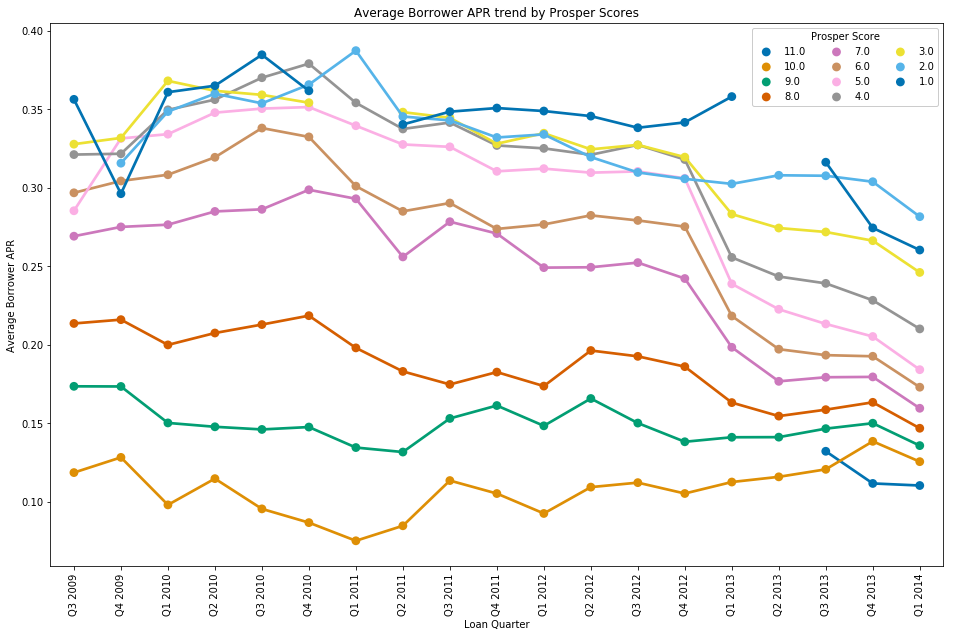

In [117]:
# We can see that avg APR secured by borrowers of various prosper scores are having an downward trend.
# It is interesting to note that borrowers of higher ProsperScore were always able to obtain lesser APRs.

df_loan = df1.groupby(['LoanOriginationQuarter','ProsperScore'])['BorrowerAPR'].mean().reset_index()

plt.figure(figsize=[16, 10])
ax = sb.pointplot(data = df_loan, x = 'LoanOriginationQuarter', y = 'BorrowerAPR', hue = 'ProsperScore',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 3,framealpha = 1, title = 'Prosper Score')
plt.title('Average Borrower APR trend by Prosper Scores')
plt.ylabel('Average Borrower APR');
plt.xlabel('Loan Quarter');
plt.xticks(rotation = 90);

In [104]:
# We want to look at the trend in the data which is split over multiple quarters. 
# If we add quarters as category to the plot it will create noise distorting the insight we would like to look at.
# So we will roll-up quarters to years and look at the trend.

df1['LoanYear'] = df1['LoanOriginationQuarter'].str.slice(start=3)

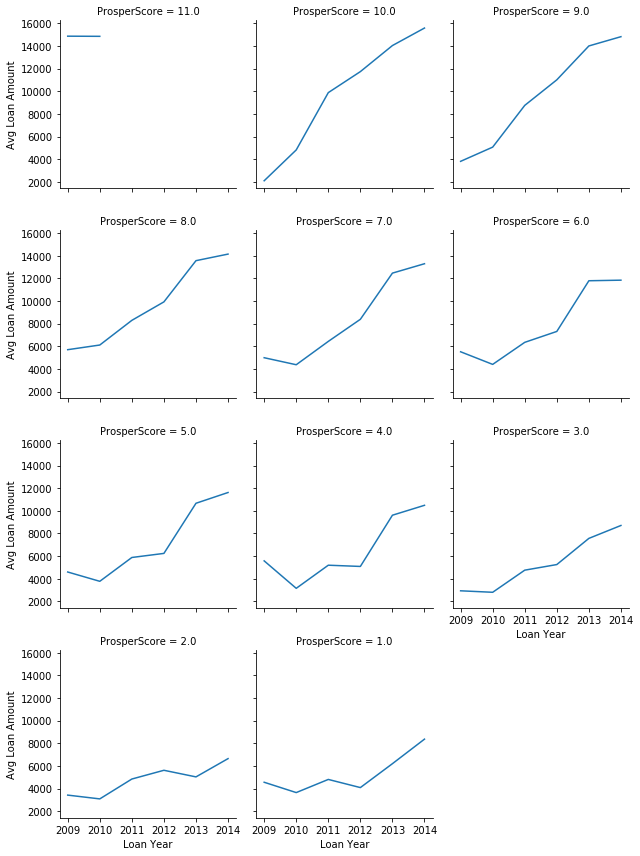

In [118]:
df_loan = df1.groupby(['ProsperScore','LoanYear'])['LoanOriginalAmount'].mean().reset_index()

g = sb.FacetGrid(data = df_loan, col = 'ProsperScore', col_wrap = 3, height = 3, 
                 col_order = [11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0])
g.map(plt.errorbar, 'LoanYear', 'LoanOriginalAmount')
g.set_xlabels('Loan Year')
g.set_ylabels('Avg Loan Amount')

plt.show;

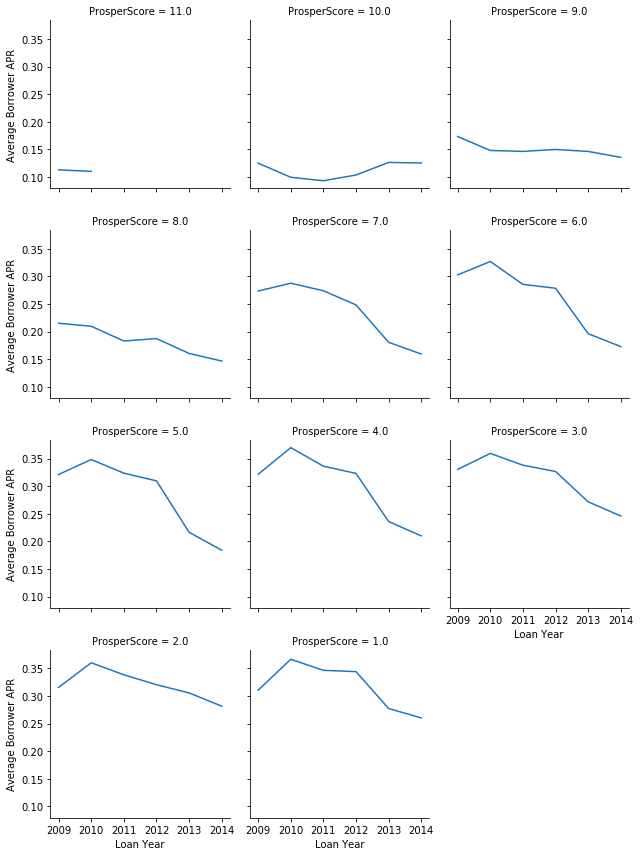

In [119]:
df_loan = df1.groupby(['ProsperScore','LoanYear'])['BorrowerAPR'].mean().reset_index()

g = sb.FacetGrid(data = df_loan, col = 'ProsperScore', col_wrap = 3, height = 3, 
                 col_order = [11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0])
g.map(plt.errorbar, 'LoanYear', 'BorrowerAPR')
g.set_xlabels('Loan Year')
g.set_ylabels('Average Borrower APR')
plt.show;

In [89]:
# I would like to check the effect of credit score on APR. 
# Since the CreditScores are provided as ranges in this dataset, we cant use it directly to look at the trend.
# I'm using upper limit as the borrowers credit score and building a bin of credit ratings to look at their trend.
# bin edges - https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

bin_edges = [300,580,670,740,800,850]
bin_names = ['Very Poor','Fair' , 'Good' , 'Very Good','Exceptional' ] 
df1['CreditRating'] = pd.cut(df1['CreditScoreRangeUpper'], bin_edges, labels=bin_names)

In [90]:
# Credit Rating as ordered categorical variable.

var = ['Very Poor','Fair' , 'Good' , 'Very Good','Exceptional']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var)
df1['CreditRating'] = df1['CreditRating'].astype(ordered_var)

In [91]:
df1.CreditRating.value_counts(sort = False)

Very Poor          0
Fair           11542
Good           52796
Very Good      16829
Exceptional     3149
Name: CreditRating, dtype: int64

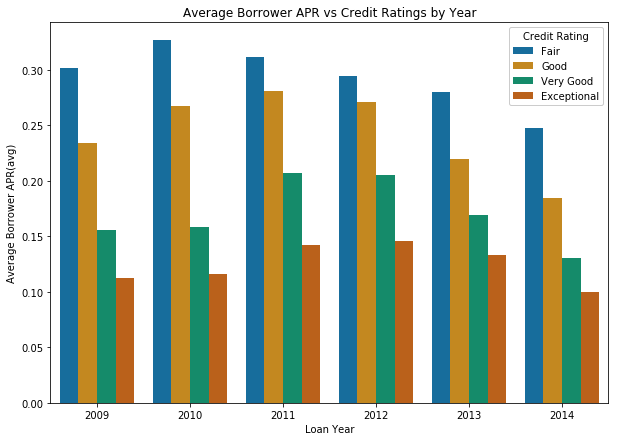

In [120]:
df1['CreditRating'] = df1['CreditRating'].cat.remove_unused_categories()
df_loan = df1.groupby(['LoanYear','CreditRating'])['BorrowerAPR'].mean().reset_index()

plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'LoanYear', y = 'BorrowerAPR', hue = 'CreditRating',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 1,framealpha = 1, title = 'Credit Rating');
plt.title('Average Borrower APR vs Credit Ratings by Year')
plt.ylabel('Average Borrower APR(avg)');
plt.xlabel('Loan Year');
#plt.xticks(rotation = 90);

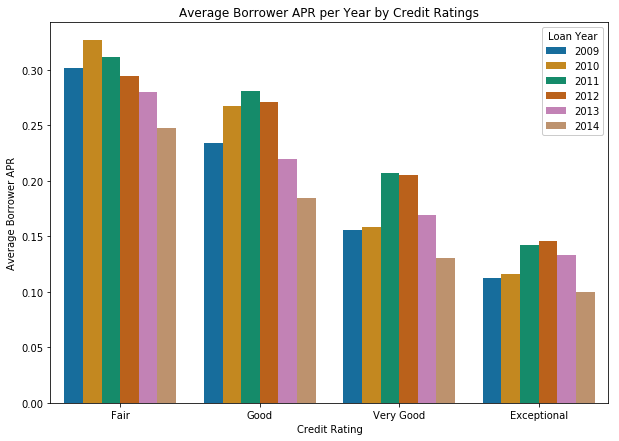

In [122]:
plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'CreditRating', y = 'BorrowerAPR', hue = 'LoanYear',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 1,framealpha = 1, title = 'Loan Year');
plt.title('Average Borrower APR per Year by Credit Ratings')
plt.ylabel('Average Borrower APR');
plt.xlabel('Credit Rating');
#plt.xticks(rotation = 90);

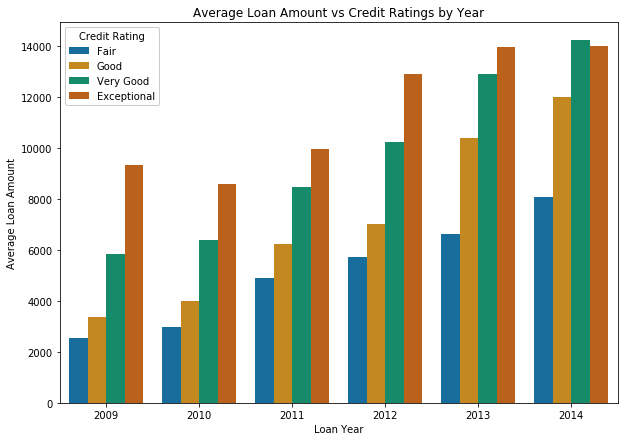

In [123]:
df1['CreditRating'] = df1['CreditRating'].cat.remove_unused_categories()
df_loan = df1.groupby(['LoanYear','CreditRating'])['LoanOriginalAmount'].mean().reset_index()

plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'LoanYear', y = 'LoanOriginalAmount', hue = 'CreditRating',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 2, ncol = 1,framealpha = 1, title = 'Credit Rating');
plt.title('Average Loan Amount vs Credit Ratings by Year')
plt.ylabel('Average Loan Amount');
plt.xlabel('Loan Year');
#plt.xticks(rotation = 90);

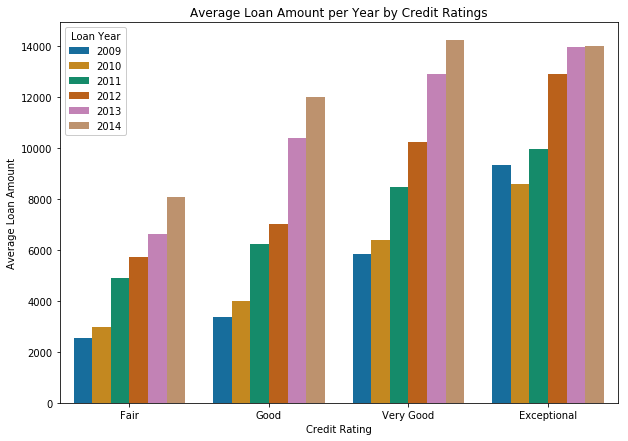

In [124]:
plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'CreditRating', y = 'LoanOriginalAmount', hue = 'LoanYear',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 2, ncol = 1,framealpha = 1, title = 'Loan Year');
plt.title('Average Loan Amount per Year by Credit Ratings')
plt.ylabel('Average Loan Amount');
plt.xlabel('Credit Rating');
#plt.xticks(rotation = 90);

In [108]:
'''df_loan = df1.groupby(['LoanYear','ProsperScore'])['LoanOriginalAmount'].median().reset_index()

plt.figure(figsize=[14,6])
ax = sb.barplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanYear',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 2,framealpha = 1, title = 'Loan Year');
#plt.xticks(rotation = 90);'''

"df_loan = df1.groupby(['LoanYear','ProsperScore'])['LoanOriginalAmount'].median().reset_index()\n\nplt.figure(figsize=[14,6])\nax = sb.barplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanYear',palette=sb.color_palette('colorblind', n_colors=11));\nax.legend(loc = 1, ncol = 2,framealpha = 1, title = 'Loan Year');\n#plt.xticks(rotation = 90);"

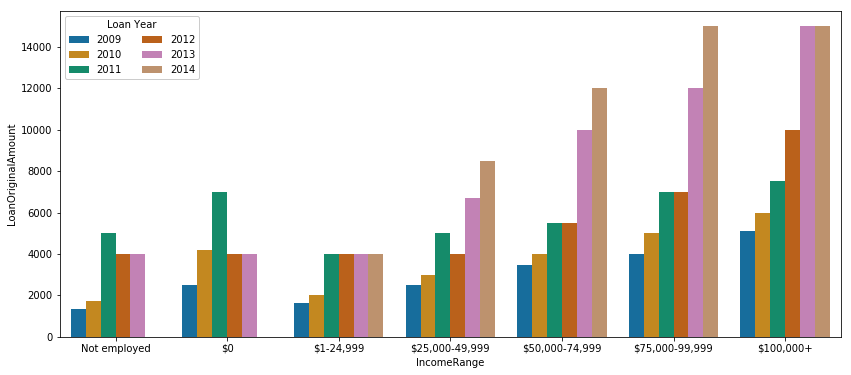

In [125]:
df_loan = df1.groupby(['LoanYear','IncomeRange'])['LoanOriginalAmount'].median().reset_index()

plt.figure(figsize=[14,6])
ax = sb.barplot(data = df_loan, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanYear',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 2, ncol = 2,framealpha = 1, title = 'Loan Year');
#plt.xticks(rotation = 90);

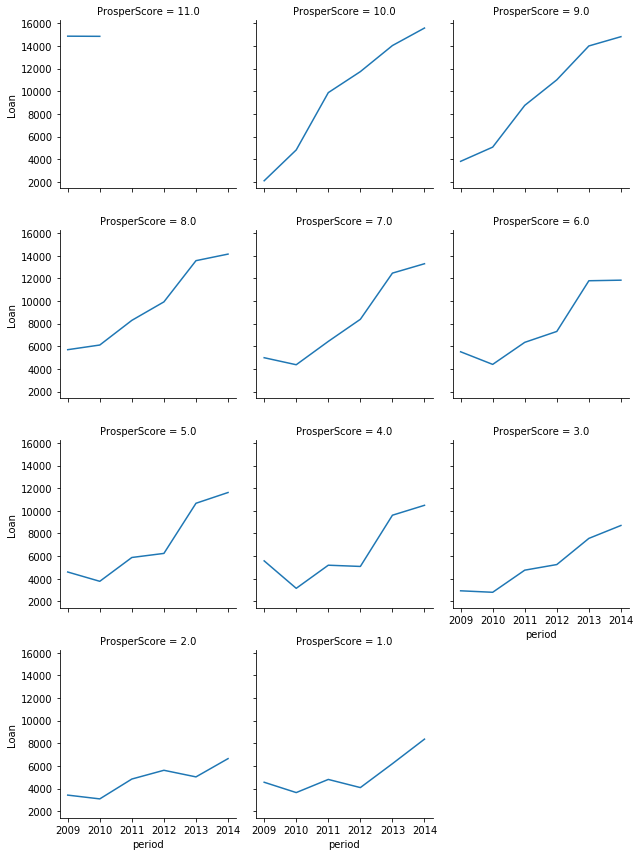

In [76]:
df_loan = df1.groupby(['ProsperScore','LoanYear'])['LoanOriginalAmount'].mean().reset_index()

g = sb.FacetGrid(data = df_loan, col = 'ProsperScore', col_wrap = 3, height = 3, 
                 col_order = [11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0])
g.map(plt.errorbar, 'LoanYear', 'LoanOriginalAmount')
g.set_xlabels('period')
g.set_ylabels('Loan')

plt.show()

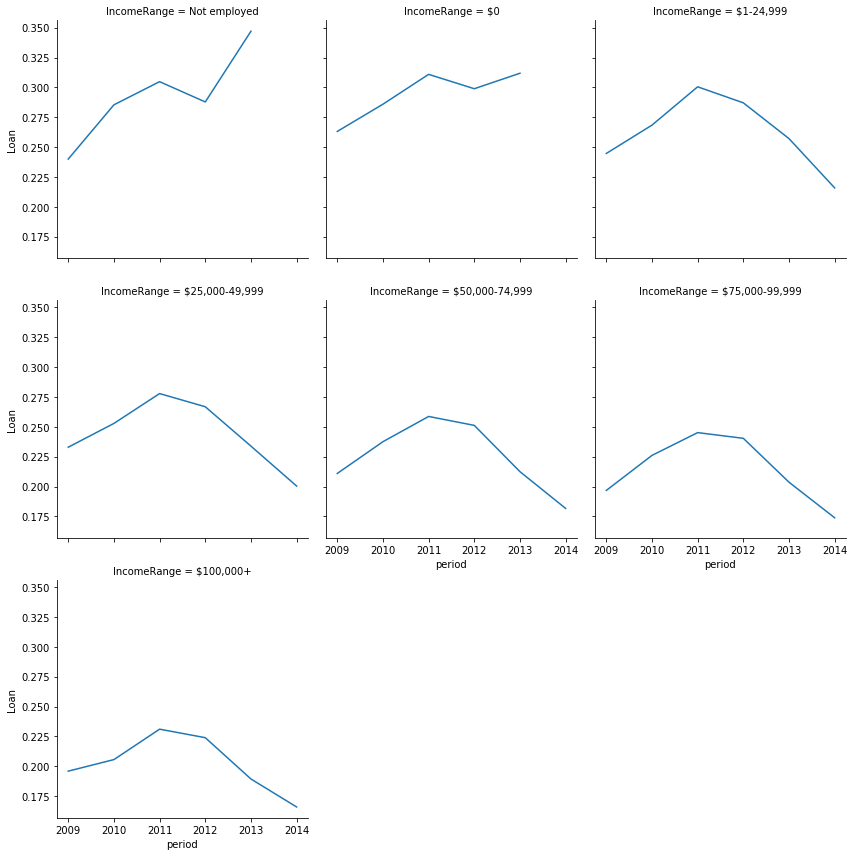

In [77]:
df_loan = df1.groupby(['IncomeRange','LoanYear'])['BorrowerAPR'].mean().reset_index()

g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', col_wrap = 3, height = 4)
g.map(plt.errorbar, 'LoanYear', 'BorrowerAPR')
g.set_xlabels('period')
g.set_ylabels('Loan')

plt.show()

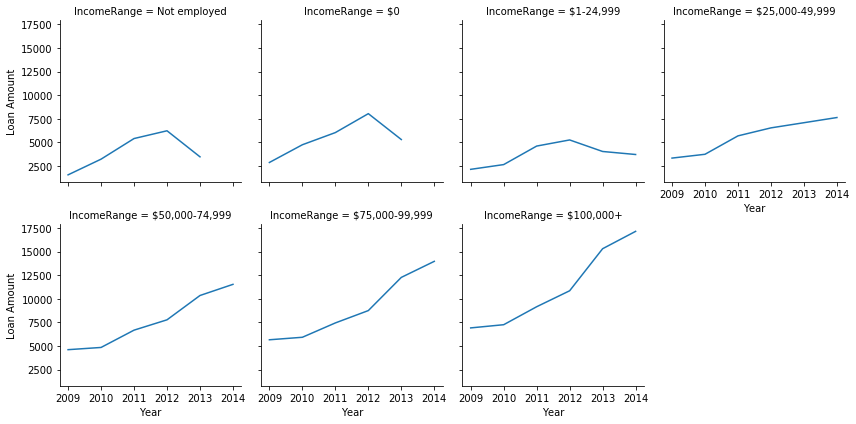

In [127]:
df_loan = df1.groupby(['IncomeRange','LoanYear'])['LoanOriginalAmount'].mean().reset_index()

g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', col_wrap = 4, height = 3)
g.map(plt.errorbar, 'LoanYear', 'LoanOriginalAmount')
g.set_xlabels('Year')
g.set_ylabels('Loan Amount')

plt.show()

In [79]:
# https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/
# I would like to check the effect of credit score on APR. 
# Since the CreditScores are provided as ranges in this dataset, we cant use it directly to look at the trend.
# I'm using upper limit as the borrowers credit score and building a bin of credit ratings to look at the trend.

bin_edges = [300,580,670,740,800,850]
bin_names = ['Very Poor','Fair' , 'Good' , 'Very Good','Exceptional' ] 
df1['CreditRating'] = pd.cut(df1['CreditScoreRangeUpper'], bin_edges, labels=bin_names)
df1.CreditRating.value_counts()

Good           52796
Very Good      16829
Fair           11542
Exceptional     3149
Very Poor          0
Name: CreditRating, dtype: int64

In [80]:
# Credit Rating as ordered categorical variable.

var = ['Very Poor','Fair' , 'Good' , 'Very Good','Exceptional']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['CreditRating'] = df1['CreditRating'].astype(ordered_var)

In [81]:
df1.CreditRating.value_counts(sort = False)

Very Poor          0
Fair           11542
Good           52796
Very Good      16829
Exceptional     3149
Name: CreditRating, dtype: int64

In [82]:
df1['CreditRating'] = df1['CreditRating'].cat.remove_unused_categories()

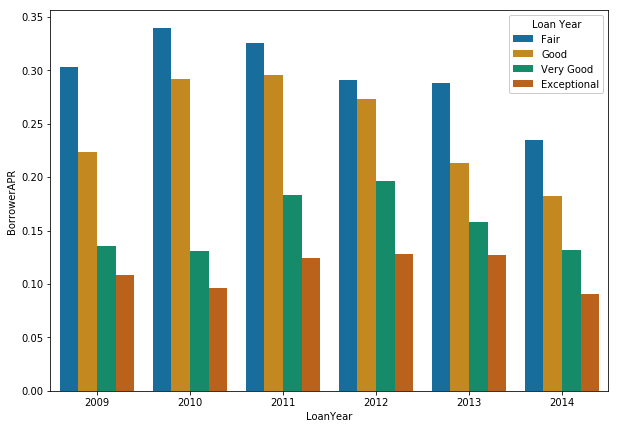

In [83]:
df_loan = df1.groupby(['LoanYear','CreditRating'])['BorrowerAPR'].median().reset_index()

plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'LoanYear', y = 'BorrowerAPR', hue = 'CreditRating',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 1,framealpha = 1, title = 'Loan Year');
#plt.xticks(rotation = 90);

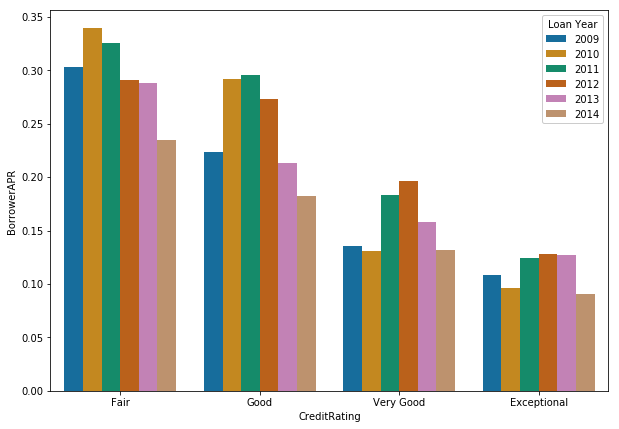

In [84]:
df_loan = df1.groupby(['LoanYear','CreditRating'])['BorrowerAPR'].median().reset_index()

plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'CreditRating', y = 'BorrowerAPR', hue = 'LoanYear',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 1,framealpha = 1, title = 'Loan Year');
#plt.xticks(rotation = 90);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!